# MΥΕ046 – Υπολογιστική Όραση: Άνοιξη 2023
## 2η Σειρά Ασκήσεων: 25% του συνολικού βαθμού
## Διδάσκων: Άγγελος Γιώτης
- ΠΑΡΑΔΟΣΗ: **Σάββατο, 13 Μαΐου, 2023 23:59**

# Γενικές Οδηγίες

Απαντήστε στα παρακάτω ζητήματα χρησιμοποιώντας Python στο συνημμένο σημειωματάριο Jupyter και ακολουθήστε τις παρακάτω οδηγίες:
 
- Οι ασκήσεις είναι **ατομικές** - δεν επιτρέπεται η μεταξύ σας συνεργασία για την υλοποίηση/παράδοσή τους.

- Δεν επιτρέπεται να χρησιμοποιήσετε κώδικα που τυχόν θα βρείτε στο web (είτε αυτούσιο, είτε παραγόμενο από ΑΙ). Η χρήση κώδικα τρίτων θα έχει σαν αποτέλεσμα τον αυτόματο μηδενισμό σας.

- Όλες οι λύσεις πρέπει να είναι γραμμένες σε αυτό το σημειωματάριο `Jupyter notebook`.

- Ο κώδικάς σας πρέπει να σχολιαστεί εκτενώς.

- Αφού ολοκληρώσετε (υλοποιήσετε και εκτελέσετε) τις απαντήσεις σας στο σημειωματάριο (notebook), εξαγάγετε το notebook ως PDF και υποβάλετε, τόσο το σημειωματάριο όσο και το PDF (δηλαδή τα αρχεία `.ipynb` και `.pdf`) στο `turnin` του μαθήματος, μαζί με ένα συνοδευτικό αρχείο `onoma.txt` που θα περιέχει το ον/μο σας και τον Α.Μ. σας.

- Οι απαντήσεις θα παραδοθούν με την εντολή: **turnin assignment_2@mye046 onoma.txt assignment2.ipynb assignment2.pdf**

- Μπορείτε να χρησιμοποιήσετε βασικά πακέτα γραμμικής άλγεβρας (π.χ. `NumPy`, `SciPy` κ.λπ.), αλλά δεν επιτρέπεται να χρησιμοποιείτε τα πακέτα/βιβλιοθήκες που επιλύουν άμεσα τα προβλήματα. Μη διστάσετε να ρωτήσετε τον διδάσκοντα εάν δεν είστε σίγουροι για τα πακέτα που θα χρησιμοποιήσετε.

- Συνιστάται ιδιαίτερα να αρχίσετε να εργάζεστε στις ασκήσεις σας το συντομότερο δυνατό!

**Late Policy:** Εργασίες που υποβάλλονται καθυστερημένα θα λαμβάνουν μείωση βαθμού 10% για κάθε 24 ώρες καθυστέρησης. Οι εργασίες δεν θα γίνονται δεκτές 72 ώρες (3 ημέρες) μετά την προθεσμία παράδοσης. Για παράδειγμα, παράδοση της εργασίας 2 ημέρες μετά την προθεσμία βαθμολογείται με άριστα το 20 (από 25).

## Άσκηση 1: Φιλτράρισμα Εικόνας (image filtering) [10 μονάδες]

### Ζήτημα 1.1 Υλοποίηση συνέλιξης[6 μονάδες]


Σε αυτό το πρόβλημα, θα υλοποιήσετε τη λειτουργία φιλτραρίσματος συνέλιξης χρησιμοποιώντας συναρτήσεις της βιβλιοθήκης NumPy, αλλά χωρίς να χρησιμοποιήσετε συναρτήσεις που λύνουν απευθείας το πρόβλημα, όπως η συνάρτηση συνέλιξης "numpy.convolve".

Όπως έχουμε δει και στο μάθημα, η συνέλιξη μπορεί να θεωρηθεί ως ένα κυλιόμενο παράθυρο που υπολογίζει ένα άθροισμα των τιμών των pixel που σταθμίζονται από τον αναποδογυρισμένο πυρήνα (a sum of pixel values weighted by the flipped kenrel).

Η έκδοσή σας θα πρέπει: i) να συμπληρώσει μια εικόνα με μηδενικά στα άκρα της εικόνας - zero-padding (επάνω-κάτω, δεξιά-αριστερά), ii) να αναστρέψει (flip) τον πυρήνα της συνέλιξης οριζόντια και κάθετα, και iii) να υπολογίσει ένα σταθμισμένο άθροισμα της γειτονιάς σε κάθε pixel.

#### Ζήτημα 1.1.1  [1 μονάδα]
Πρώτα θα χρειαστεί να υλοποιήσετε τη συνάρτηση **zero_pad**.

In [1]:
import numpy as np
from time import time
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt

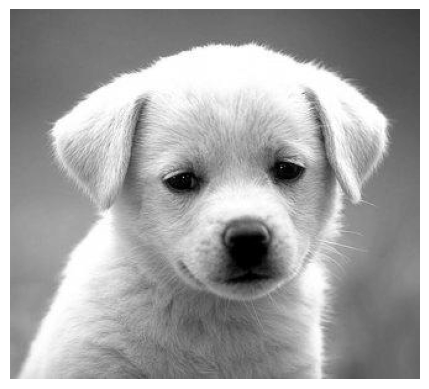

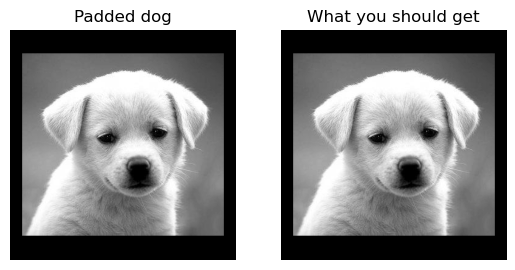

In [2]:
def zero_pad(image, pad_top, pad_down, pad_left, pad_right):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_top = 1, pad_down = 1, pad_left = 2, pad_right = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W)
        pad_left: width of the zero padding to the left of the first column
        pad_right: width of the zero padding to the right of the last column
        pad_top: height of the zero padding above the first row
        pad_down: height of the zero padding below the last row

    Returns:
        out: numpy array of shape (H + pad_top + pad_down, W + pad_left + pad_right)
    """
    

    #The technique of zero-padding is used to create larger image, than the original.
    #It is used when the filter that is going to be used for convolution is larger than..
    #..the original image. Now that we've established the context we can move on to..
    #explain the process
    #Obviously the new image height will be equal to the sum of the..
    #.. original image height + rows of 0's above the first row + rows of 0's..
    #.. below the last row
    paddingHeight = pad_top + pad_down
    paddedImageHeight = image.shape[0] + paddingHeight
    #In a similar pattern the new width will be the old width plus the number of..
    #..the "0" columns we wish to add left and right of the old image
    paddingWidth = pad_left + pad_right
    paddedImageWidth = image.shape[1] + paddingWidth
    #Create a new array of zeros that will host the new image
    #Its dimensions will be the new dimensions that we've calculated above
    paddedImage = np.zeros([paddedImageHeight,paddedImageWidth])
    #We've establisted that new image will be, the old one with a "frame" of 0's surrounding..
    #..it. Since we've created the blank image of 0's, all that's left to be done is fill..
    #..the center with the original image. All the excess 0's up,down,left,right should..
    #..remain intact.
    #We're iterating through the image
    #for j in range image.shape[0] and for i in range image.shape[1]
    #Since we want the added zeroes to remain intact we can't just do..
    #paddedImage[j,i] = image[j,i]. This would be FALSE!
    #Instead we we assign the image[j,i] to the paddedImage[j + pad_top,i + pad_left] ones.
    #This way we'll fill only the intented pixels of the image, preserving the newly added..
    #pixels as zeroes.
    #For aesthetic/ good programming purposes we assign the image dimensions to rows,columns and..
    #..use those instead
    rows = image.shape[0] 
    columns = image.shape[1]
    for j in range(rows):
        for i in range(columns):
            paddedImage[j + pad_top,i + pad_left] = image[j,i]
    
    #Assing to the variable that will be returned
    out = paddedImage
    
    return out

# Open image as grayscale
img = io.imread('images/dog.jpg', as_gray=True)

# Show image
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_height, pad_width, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img,cmap='gray')
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('images/padded_dog.jpg', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img,cmap='gray')
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Ζήτημα 1.1.2 [3 μονάδες]
Τώρα υλοποιήστε τη συνάρτηση **`conv`**, **χρησιμοποιώντας το πολύ 2 βρόχους επανάληψης**. Αυτή η συνάρτηση θα πρέπει να δέχεται μια εικόνα $f$ και έναν πυρήνα/φίλτρο $h$ ως εισόδους και να εξάγει το αποτέλεσμα της συνέλιξης (προκύπτουσα εικόνα) $(f*h)$ που έχει το **ίδιο** σχήμα (διαστάσεις) με την εικόνα εισόδου (χρησιμοποιήστε συμπλήρωση μηδενικών - zero padding, για να το πετύχετε). Θα θεωρήσουμε πως χρησιμοποιούμε μόνο πυρήνες με περιττό πλάτος και περιττό ύψος. Ανάλογα με τον υπολογιστή, η υλοποίησή σας θα χρειαστεί περίπου ένα δευτερόλεπτο ή λιγότερο για να εκτελεστεί.

Υπόδειξη: Για να έχει το αποτέλεσμα της συνέλιξης $g(x,y) = h(x,y) * f(x,y)$ το **ίδιο σχήμα** με την εικόνα εισόδου $f$, θα πρέπει οι διαστάσεις της συμπληρωμένης (με μηδενικά) εικόνας "padded_$f$" να είναι $P = A + C - 1$ και $Q = B + D - 1$, όπου $A, Β:height, width$ της εικόνας $f$, ενώ $C, D:height, width$, του πυρήνα $h$.

took 0.555681 seconds.


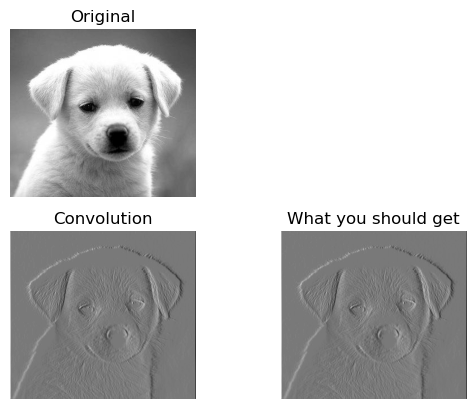

In [3]:
def conv(image, kernel):
    """ An efficient implementation of a convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute a weighted sum of the neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - You should need at most two nested for-loops
        - You may find np.flip() and np.sum() useful
        - You need to handle both odd and even kernel size

    Args:
        image: numpy array of shape (Hi, Wi)
        kernel: numpy array of shape (Hk, Wk)

    Returns:
        out: numpy array of shape (Hi, Wi)
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    #Set pad_top,pad_bottom,pad_left,pad_right that are needed for the zero_pad() func
    #HeightKernel is for top,down and WidthKernel is for left,right
    #𝑃=𝐴+𝐶−1 and 𝑄=𝐵+𝐷−1, where A,B the height and width of the image f respectively
    #and C,D the height and width of the kernel respectively.
    #We are gonna use these formulas to calculate pad_top,pad_down,pad_left,pad_right
    #Hk is the sum of the total pixels, which means half of them is for pad_top and..
    #half of them is for pad_down. So in order to get them and use them as arguements..
    #we need to divide the sum and get each half assigned to the pad_top,pad_down variables
    #that will be used as inputs for the zero_pad() function.
    #The following calculations take into account both scenarios:
    #1) The case in which the kernel size is odd
    #2) The case in which the kernel size is even
    #Even if we assigned pad_top as Hk//2 and pad_down as (Hk - 1)//2, the result would be..
    #.. the exact same
    pad_top = (Hk - 1)//2
    pad_down = Hk//2
    #In a similar fashion we do the exact same thing with the pad_left,pad_right.
    #Since the Wk is the sum of the total pixels, which means half of them is for..
    #pad_left and half of them is for pad_right
    #Same as before the (Wk - 1)//2 and Wk//2 are interchangeable assignments
    pad_left = (Wk - 1)//2
    pad_right = Wk//2
    #Call zeros_pad() to create an image with equal dimensions to those of the kernel
    padded_f = zero_pad(image,pad_top,pad_down,pad_left,pad_right)
    #In order to use the kernel for convolution and get the correct..
    #..outcome, like the "what you should get", we need to flip it
    #Otherwise we'd get an outcome similar to the "what you should get" but not the..
    #..exact one, since the filter would be applied in the wrong direction.
    #In most cases, like for example later on in this assignment the convolution..
    #..operation is performed using a flipped kernel.
    flipped_kernel = np.flip(kernel)   
    
    #Earlier we used Hk,Wk since we wanted to refer to the kernel dimensions.
    #Now we need to iterate through the image to execute the convolution so we'll use Hi,Wi
    #Iterate through the image directions Hi,Wi
    #Specifically j iterates through the height of the original image
    for j in range(Hi):
        #Whereas i iterates through the width of the original image
        for i in range(Wi):       
            #Since we know that the formula for convolution is:
            #𝑔(𝑥,𝑦)=ℎ(𝑥,𝑦)∗𝑓(𝑥,𝑦)
            #we need to multiply each respective padded_f sub-array with each..
            #..corresponding kernel element. After that we add up the total summary..
            #..of each one of these multiplications using np.sum() 
            #.. and assign the summary as the output pixel out[j,i]
            #using np.sum() guarantees us the..
            #..most optimal run time. The calculation of the summary of those multiplications..
            #could be achieved using more for-loops and no list comprehension. 
            #But it is heavily instructed that we use 2 nested for-loops at most.
            #And as a result we need to use lsit comprehension as well in order to access..
            #..all the elemements of each sub-array.
            #Plus the execution speed of this program would be significantly impacted should..
            #.. we have used more nested loops and no list comprehension!!!
            #helperArray's name is self- explanatory. Its use is just to realive some of the line..
            #.. density should we have used np.sum(flipped_kernel*padded_f[j:j+Hk,i:i+Wk]) instead
            helperArray = flipped_kernel*padded_f[j:j+Hk,i:i+Wk]
            out[j,i] = np.sum(helperArray)
            
    return out

# Simple convolution kernel.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

t1 = time()
out = conv(img, kernel)
t2 = time()
print("took %f seconds." % (t2 - t1))

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out,cmap='gray')

plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('images/convolved_dog.jpg', as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img,cmap='gray')
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Ζήτημα 1.1.3 [1 μονάδα]
Τώρα ας φιλτράρουμε μερικές εικόνες! Σε αυτό το ζήτημα, θα εφαρμόσετε τη συνάρτηση συνέλιξης που μόλις υλοποιήσατε για να δημιουργήσετε μερικά ενδιαφέροντα εφέ εικόνας. Πιο συγκεκριμένα, θα χρησιμοποιήσετε συνέλιξη για να "θολώσετε" (blur) και να "οξύνετε" (sharpen) την εικόνα.

Αρχικά, θα εφαρμόσετε συνέλιξη για θόλωση εικόνας. Για να το πετύχετε αυτό, πραγματοποιήστε συνέλιξη της εικόνας του σκύλου με ένα Γκαουσιανό φίλτρο 13x13 για $\sigma = 2,0$. Μπορείτε να χρησιμοποιήσετε τη συνάρτηση που σας δίνετε για να πάρετε τον Γκαουσιανό πυρήνα της συνέλιξης.

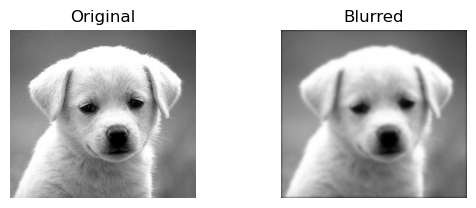

In [4]:
def gaussian2d(sig):
    """
    Creates 2D Gaussian kernel with a sigma of `sig`.
    """
    filter_size = int(sig * 6)
    if filter_size % 2 == 0:
        filter_size += 1
        
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def blur_image(img):
    """Blur the image by convolving with a Gaussian filter."""
    #Create an empty array of zeros. np.zeros_like(img) specifically creates an array with..
    #.. the same data type and dimensions as the img
    #In terms of dimensions it's the same as writing np.zeros([img.shape[0],img.shape[1]])
    blurred_img = np.zeros_like(img)
    #Get filter/kernel for the convolution. We do not need to worry about the kernel being
    #..13x13. Using sigma = 2.0 as input will result in a 13x13 thanks to the following..
    #code that is part of the gaussian2d():
    #filter_size = int(sig * 6)
    #if filter_size % 2 == 0:
    #   filter_size += 1
    #After this we'll get a filter of filter_size = 13
    #Call gaussian2d() with the sigma suggested, then assign the returned value to kernel var.
    kernel = gaussian2d(2.0)
    #Call the conv() function that was implemented earlier, using img and kernel as arguements.
    #The result of said convolution should return a blurred version of the original img
    #Lastly assign said blurred img to the variable so it can later be returned at the end of..
    #..this function.
    blurred_img = conv(img, kernel)
    
    return blurred_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot blurred image
plt.subplot(2,2,2)
plt.imshow(blur_image(img),cmap='gray')
plt.title('Blurred')
plt.axis('off')

plt.show()

#### Ζήτημα 1.1.4 [1 μονάδα]
Στη συνέχεια, θα χρησιμοποιήσουμε τη συνέλιξη για την όξυνση (αύξηση ευκρίνειας) των εικόνων. Πραγματοποιήστε συνέλιξη της εικόνας με το ακόλουθο φίλτρο για να δημιουργήσετε ένα πιο ευκρινές αποτέλεσμα. Για ευκολία, σας δίνετε και το φίλτρο όξυνσης:


In [5]:
sharpening_kernel = np.array([
    [1, 4,     6,  4, 1],
    [4, 16,   24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16,   24, 16, 4],
    [1,  4,    6,  4, 1],
]) * -1.0 / 256.0

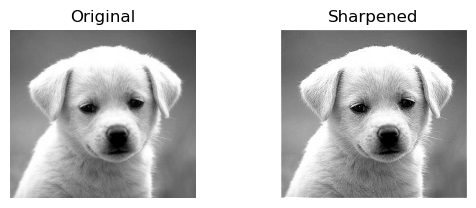

In [6]:
def sharpen_image(img):
    """Sharpen the image by convolving with a sharpening filter."""
    #Create an empty array of zeros. np.zeros_like(img) specifically creates an array with..
    #.. the same data type and dimensions as the img
    #In terms of dimensions it's the same as writing np.zeros([img.shape[0],img.shape[1]])
    sharpened_img = np.zeros_like(img)
    #Since the sharpening kernel is being rpovided to us, all we need to do is convole the image with..
    #..the kernel
    #Call the conv() function that was implemented earlier using img and.. 
    #.. the sharpening kernel as arguements.
    #The result should be a sharpenned version of the original image. Save the returned image
    sharpened_img = conv(img, sharpening_kernel)

    return sharpened_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img, vmin=0.0, vmax=1.0,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot sharpened image
plt.subplot(2,2,2)
plt.imshow(sharpen_image(img), vmin=0.0, vmax=1.0,cmap='gray')
plt.title('Sharpened')
plt.axis('off')

plt.show()

### Ζήτημα 1.2 Αντιστοίχιση/Ταίριασμα Προτύπου (Template Matching) [4 μονάδες]
Υποθέτουμε το παρακάτω πρόβλημα. Έστω ένας υπάλληλος κάποιου καταστήματος super market είναι υπεύθυνος για τον περιοδικό έλεχγο των ραφιών, με σκοπό την αναπλήρωσή τους με προϊόντα που έχουν εξαντληθεί/πωληθεί (restocking sold-out items). Σε αυτή την περίπτωση, η ανάπτυξη μιας εφαρμογής υπολογιστικής όρασης, η οποία θα "βλέπει" και θα καταγράφει σε πραγματικό χρόνο τα προϊόντα στα ράφια θα μπορούσε να αυτοματοποιήσει τη δουλειά του υπαλλήλου.

Ευτυχώς, κάτι τέτοιο μπορεί να επιλυθεί ακόμη και με πρωταρχικές τεχνικές ψηφιακής επεξεργασίας εικόνας που βασίζονται στη συνέλιξη, η οποία μπορεί να αξιοποιηθεί για την αντιστοίχιση μιας εικόνας με κάποιο πρότυπο (template matching):

- Ένα αναποδογυρισμένο (flipped) πρότυπο *t* πολλαπλασιάζεται με τις περιοχές μιας μεγαλύτερης εικόνας *f* για να υπολογιστεί πόσο παρόμοια είναι κάθε περιοχή με το πρότυπο (πόσο μοιάζει κάθε περιοχή με την εικόνα προτύπου). Σημειώστε, ότι θα πρέπει να αναστρέψετε το φίλτρο πριν το δώσετε στη συνάρτηση συνέλιξης, έτσι ώστε συνολικά να μην είναι αναποδογυρισμένο όταν κάνετε συγκρίσεις.

- Επίσης, Θα χρειαστεί να αφαιρέσετε τη μέση τιμή της εικόνας ή του προτύπου (όποια και αν επιλέξετε, αφαιρέστε την ίδια τιμή, τόσο από την εικόνα όσο και από το πρότυπο) έτσι ώστε η λύση σας να μην είναι ευαίσθητη προς τις περιοχές υψηλότερης έντασης (λευκές).

- Δοκιμάστε να εκτελέσετε αρχικά τη συνέλιξη του ανεστραμμένου πυρήνα (προτύπου) με την εικόνα, χωρίς να αφαιρέσετε τη μέση τιμή και δείτε την ευαισθησία του αποτελέσματος σε περιοχές υψηλότερης έντασης. Εξηγείστε (σε σχόλια) γιατί η αφαίρεση της μέσης τιμής (και από τις 2 εικόνες) αντιμετωπίζει το πρόβλημα, κάνοντας τη λύση σας ανθεκτική σε περιοχές υψηλής έντασης.

- Παρέχεται το πρότυπο ενός προϊόντος (template.jpg) και η εικόνα του ραφιού (shelf.jpg). Θα χρησιμοποιήσετε συνέλιξη για να βρείτε το προϊόν στο ράφι.


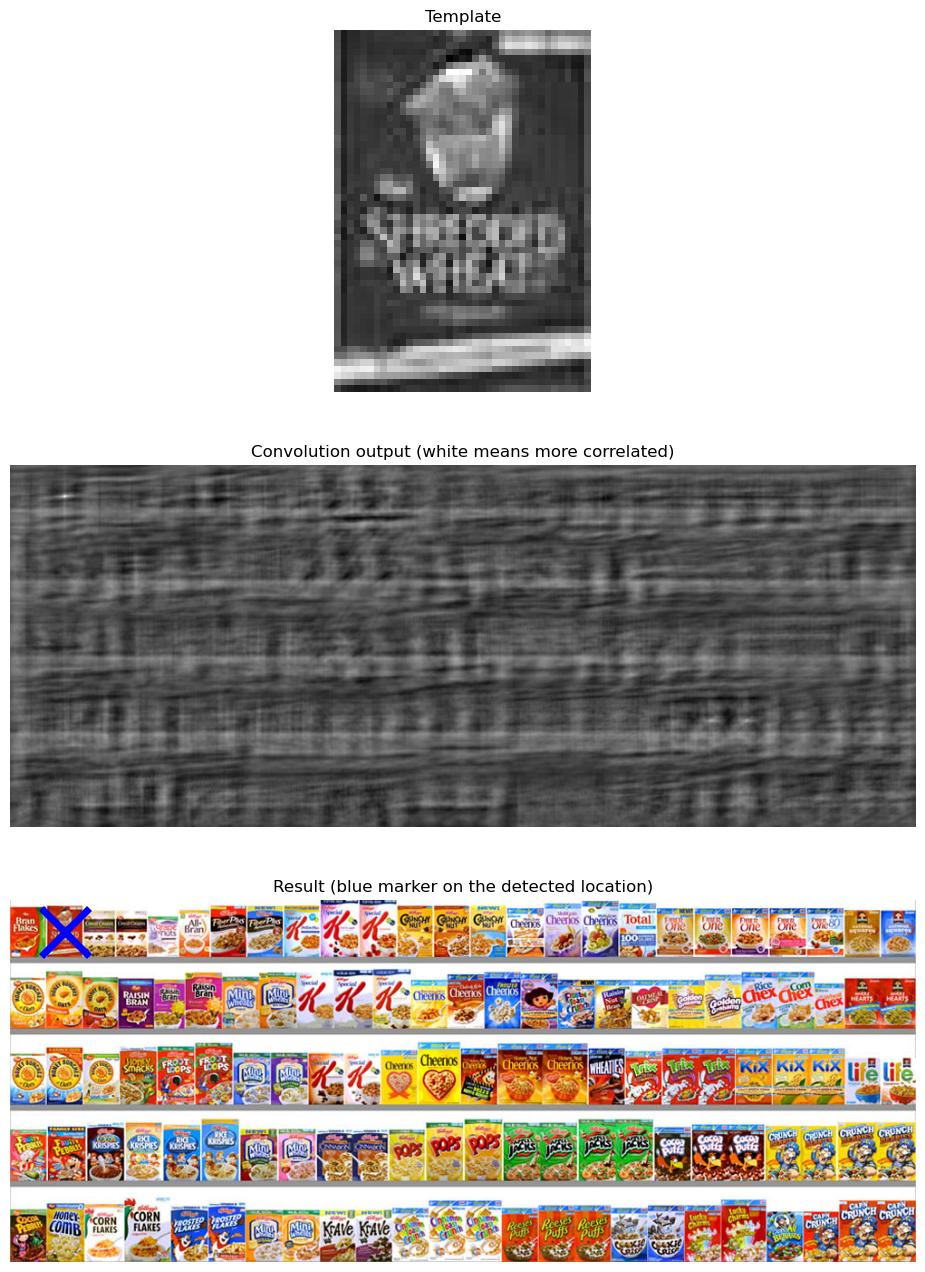

In [7]:
# Load template and image in grayscale
img = io.imread('images/shelf.jpg')
img_gray = io.imread('images/shelf.jpg', as_gray=True)
temp = io.imread('images/template.jpg')
temp_gray = io.imread('images/template.jpg', as_gray=True)

# Perform a convolution between the image (grayscale) and the template (grayscale) and store 
# the result in the out variable

#First we flip the template as instructed. This is a necessary step because later on we are..
#..gonna call conv(). Specifically conv(img_gray,flipped_t)
#                                               ~~~~~~~~~~~
#The second arguement is going to be used as the "kernel". Inside the conv() func we..
#..use np.flip(kernel). So in order to have the correct results we need to flip the template beforehand and..
#..use that instead.
flipped_t = np.flip(temp_gray)
#Another necessary instruction step is to subtract the mean value of either img or template from both of them.
#Subtracting the mean value of img will result in a wrong outcome. So we are left with subtracting the mean..
#..value of the template from both img_gray/flipped_t. Another thing to mention is that either..
#..np.mean(flipped_t) (the mean value of the flipped temp) or np.mean(temp_gray) (them mean of temp_gray)..
#..will result in the correct outcome.
#Subtracting the mean will result in normalizing the images before comparing them
#Since the original images have a vast variety of pixel values, brightness and contrasts, without it
#..it would be very difficult to compare them. This would ultimately result in a wrong outcome since..
#.. the overall "noise" produced by factors as different brightnesses and contrasts would hinder our ability..
#.. to do pixel by pixel comparison. By subtracting the mean value we are removing some of this "distraction"..
#.. making our comparisons more accurate and precise,since we can focus on the similarity of certain image..
#.. patterns and not on less important factors, such as whether the brightness/ constrast is similar.
img_gray = img_gray - np.mean(flipped_t)
flipped_t = flipped_t - np.mean(flipped_t)
#Lastly we call conv(img_gray,flipped_t). It is very important that the template is used as the..
#.. 2ND arguement, in the spot of the kernel! That's the reason we flipped it, as we've already explained
#.. earlier.
out = conv(img_gray,flipped_t)

# Find the (x, y) coordinates of the maximum value in the out variable
#Now that the convolution is done, it's high time that we find the position of the specific item.
#After the convolution there should be a clear white spot marking the high correlation of the item..
#..we're searching for and the pattern in the shelf image. The maximum value should be this exact white spot.
#All other areas where the product pattern doesn't much the rest of the shelf should have darker tones of..
#..grayscale. So finding this white spot will tell where the 'X' should be put.
#The following is a standard algorithm for finding the max value of a 2D array. In the first iteration we..
#.. assign the max value as the first element. Then we compare it. Each time we find a larger value..
#..we assign it as the new max value replacing the old with the new value coordinates
#And the old positional  indexes with the ones of the new max
rows, columns = out.shape[0], out.shape[1]
for y in range(rows):
    for x in range(columns):
        if y == x == 0: #First turn. Assign element out[0][0] as max. Also x = y = 0
            maxValue = out[y,x]
            maxX = maxY = 0
        if out[y,x] > maxValue: #For x,y > 0 -> compare with the current max. Replace if larger.
            maxValue = out[y,x]
            maxX = x
            maxY = y
#Since plt.plot(x, y, 'bx', ms=35, mew=5) is used for printing, our last step is to assign the..
#..maxX,maxY to the x,y that will be used for printing.
x = maxX
y = maxY


# Display product template
plt.figure(figsize=(20,16))
plt.subplot(3, 1, 1)
plt.imshow(temp_gray, cmap="gray")
plt.title('Template')
plt.axis('off')

# Display convolution output
plt.subplot(3, 1, 2)
plt.imshow(out, cmap="gray")
plt.title('Convolution output (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img, cmap="gray")
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=35, mew=5)
plt.show()

## Άσκηση 2: Ανίχνευση Ακμών (Edge detection) [15 μονάδες]

Σε αυτό το πρόβλημα, θα υλοποιήσετε τα βήματα του ανιχνευτή ακμών "Canny". Πρέπει να ακολουθήσετε τα βήματα με τη σειρά που σας δίνετε.

### Ζήτημα 2.1 Εξομάλυνση (Smoothing) [1 μονάδα]
Αρχικά, πρέπει να εξομαλύνουμε τις εικόνες για να αποτρέψουμε τον θόρυβο να θεωρηθεί ως ακμές. Για αυτήν την άσκηση, χρησιμοποιήστε ένα φίλτρο Γκαουσιανού πυρήνα (Gaussian) 9x9 με $\sigma = 1,5$ για να εξομαλύνετε τις εικόνες.

In [8]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.signal import convolve
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = [5, 5]

In [9]:
def gaussian2d(sig=None):
    """Creates a 2D Gaussian kernel with
    side length `filter_size` and a sigma of `sig`."""
    filter_size = int(sig * 6)
    if filter_size % 2 == 0:
        filter_size += 1
        
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

In [10]:
def smooth(image):
    #All we need to do is call gaussian2d(1.5), since sigma = 1.5 and assign it to a variable.
    #The "9x9" part will be done automatically through the following code:
    #filter_size = int(sig * 6)
    #if filter_size % 2 == 0:
    #   filter_size += 1
    #filter_size will be equal to 1.5*6=9 
    gaussianKernel = gaussian2d(1.5)
    #After that all that's left to be done is call the conv() func we've implemented at the beginning of this..
    #..assignment using image and the newly initialized gaussianKernel as input arguements.
    smoothedImage = conv(image, gaussianKernel)
    return smoothedImage

Original:


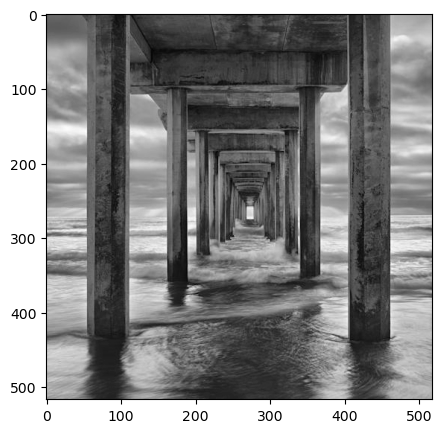

Smoothed:


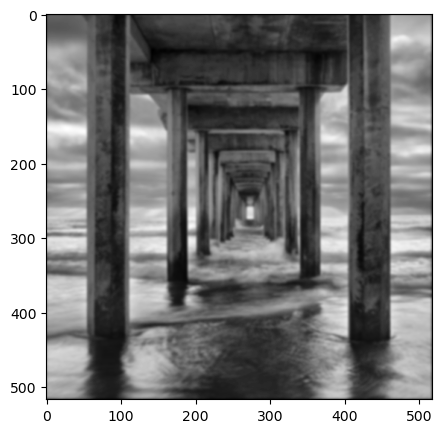

In [11]:
# Load image in grayscale
image = io.imread('images/canny.jpg', as_gray=True)
assert len(image.shape) == 2, 'image should be grayscale; check your Python/skimage versions'
smoothed = smooth(image)
print('Original:')
plt.imshow(image, cmap=cm.gray)
plt.show()

print('Smoothed:')
plt.imshow(smoothed, cmap=cm.gray)
plt.show()

### Ζήτημα 2.2 Υπολογισμός Παραγώγου (Gradient Computation [4 μονάδες]
Αφού ολοκληρώσετε την εξομάλυνση, βρείτε την παράγωγο/κλίση της εικόνας στην οριζόντια και κάθετη κατεύθυνση. Υπολογίστε την εικόνα του μέτρου (μεγέθους) κλίσης (gradient magnitude) ως $|G| = \sqrt{G_x^2 + G_y^2}$. Η κατεύθυνση της ακμής για κάθε pixel δίνεται από την εξίσωση $G_\theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)$.

In [12]:
def gradient(image):
    #First we need to find gx,gy in order to find the magnitude,theta of gradient.
    #A way to calculate the gx,gy components is to use the sobel arrays provided in the..
    #..slides of lecture 5. After that we call conv(image,sobelX) for the gx component..
    #..and conv(image,sobelY) for the gy component.
    sobelX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobelY = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    gx = conv(image,sobelX)
    gy = conv(image,sobelY)
    #After that it's pretty straight forward. All we have to do is translate the formulas..
    #.. for calculating grad magnitude, theta into code
    #1) |G| = (Gx^2 + Gy^2)^(1/2) -> np.sqrt(gx**2 + gy**2)
    #np.sqrt is a function provided by numpy that returns the square root of the input arguement
    #whereas gx**2 + gy**2 -> (Gx^2 + Gy^2)
    #2)𝐺𝜃=tan−1(𝐺𝑦𝐺𝑥) -> np.arctan2(gy, gx)
    #tan−1() -> np.arctan2(). archtan2 is yet again provided by numpy. All we have to do..
    #.. is fill in the arguements. In this case gy is the numerator and gx the denominator.
    g_mag = np.sqrt(gx**2 + gy**2)
    g_theta = np.arctan2(gy, gx)
    
    return g_mag, g_theta

Gradient magnitude:


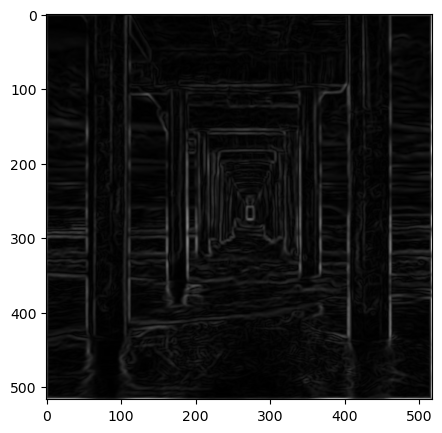

In [13]:
g_mag, g_theta = gradient(smoothed)
print('Gradient magnitude:')
plt.imshow(g_mag, cmap=cm.gray)
plt.show()

### Ζήτημα 2.3 Καταστολή μη-μεγίστων (Non-Maximum Suppression) [5 μονάδες]
Θα θέλαμε οι ακμές μας να είναι ευκρινείς (sharp), σε αντίθεση με αυτές στην εικόνα ντεγκραντέ (gradient image). Χρησιμοποιήστε καταστολή μη-μεγίστων για να διατηρήσετε όλα τα τοπικά μέγιστα και απορρίψτε τα υπόλοιπα. Μπορείτε να χρησιμοποιήσετε την ακόλουθη μέθοδο για να το κάνετε:

  - Για κάθε εικονοστοιχείο στην εικόνα του μέτρου (μεγέθους) της κλίσης (gradient magnitude image):
    - Στρογγυλοποιήστε την κατεύθυνση της κλίσης $\theta$ στο πλησιέστερο πολλαπλάσιο των $45^{\circ}$ (το οποίο θα αναφέρουμε ως $ve$).
    - Συγκρίνετε την ισχύ της ακμής (edge strength) στο τρέχον εικονοστοιχείο (δηλαδή το μέτρο της κλίσης) με τα εικονοστοιχεία κατά μήκος της κατεύθυνσης κλίσης $+ve$ και $-ve$ στην 8-γειτονιά του (8-connected pixel neighborhood).
    - Εάν το εικονοστοιχείο δεν έχει μεγαλύτερη τιμή από τους δύο γείτονές του στις κατευθύνσεις κλίσης $+ve$ και $-ve$, καταργήστε (suppress) την τιμή του εικονοστοιχείου (ορίστε το σε 0). Ακολουθώντας αυτή τη διαδικασία, διατηρούμε τις τιμές μόνο εκείνων των pixel που έχουν μέγιστα μεγέθη κλίσης στη γειτονιά κατά μήκος των κατευθύνσεων κλίσης $+ve$ και $-ve$.
  - Επιστρέψτε το αποτέλεσμα ως την εικόνα-απόκριση της καταστολής μη-μεγίστων (NMS).

In [14]:
def nms(g_mag, g_theta):
    #First of all the np.degrees(g_theta) is a handy function that returns an array of degrees.
    #Using this function helps us avoid any extra calculations that we would have to do manually
    ve = np.degrees(g_theta)
    #Once we get our array of degrees, our new objective is to round each element..
    #.. to the closest multiplicative of 45 degrees. 
    #np.round(ve/45) will result in one of the following results {0,1,2,3,4}
    #With this we calculate how many times of 45 degrees is each element.
    #After that we multiply by 45 again since we've been asked to round to the closest..
    #..multiplicative of 45 degrees. After the np.round(ve/45) * 45, ve will be one of the..
    #..following: {0,45,90,135,180}
    ve = np.round(ve/45) * 45
    #Get the dimensions of the gradient magnitude array, to use it for the iteration.
    rows = g_mag.shape[0]
    columns = g_mag.shape[1]
    #After those calculations there might be some negative values. In  order to avoid..
    #..excess and long conditions, if the value is negative we add 180 to it.
    for j in range(rows):
        for i in range(columns):
            if ve[j,i] < 0:
                ve[j,i] = ve[j,i] + 180
    ve = np.round(ve).astype(int) #Turn the {0.0,45.0,90.0,135.0} to  {0,45,90,135}
    #Our objective is to supress (set to 0) any pixels that meet a spicific criteria.
    #So we derive that the outcome should be like g_mag with the exception of those certain..
    #..pixels that will change to 0. So we set the outcome to be an exact copy of g_mag.
    #After that all that's left to do is change to 0, any pixels that meet the specific criteria.
    nms_response = np.copy(g_mag)
    #For loops trhough the dimensions
    for j in range(1, rows-1):
        for i in range(1, columns-1):
            #If the degrees are 0 or 180 the direction is like this
            #0: parallel to the x'x
            #180: paraller to the xx'
            #Now it is fairly obvious which pixels are the
            #.. +ve, -Ve neighbors. Those +1,-1 on the x-axis
            if ve[j,i] == 0 or ve[j,i] == 180:
                neighbor1 = g_mag[j,i-1]
                neighbor2 = g_mag[j,i+1]
            #If the degrees are 45 the direction is like this
            #45. the vector will be pointing towards top right
            #After this it is fairly obvious which pixels are the
            #.. +ve, -Ve neighbors. Those +1,-1 on both the x,y axes           
            elif ve[j,i] == 45:
                neighbor1 = g_mag[j-1,i-1]
                neighbor2 = g_mag[j+1,i+1]
            #If the degrees are 90 the direction is like this
            #90. the vector will be pointing upwards
            #After this it is fairly obvious which pixels are the
            #.. +ve, -Ve neighbors. Those +1,-1 on the y-axis                
            elif ve[j,i] == 90:
                neighbor1 = g_mag[j-1,i]
                neighbor2 = g_mag[j+1,i]
            #If the degrees are 135 the direction is like this
            #135. the vector will be pointing towards the top left
            #Basically this case is the 45 degrees case, with the difference that it is..
            #..mirrored around the y-axis.
            #After this it is fairly obvious which pixels are the
            #.. +ve, -Ve neighbors.  
            elif ve[j,i] == 135:
                neighbor1 = g_mag[j+1,i-1]
                neighbor2 = g_mag[j-1,i+1]
                
            neighborhood = [neighbor1,neighbor2] #Contains the neighboring pixels
            
            #Now that we've appointed our neighbor pixels, it all comes down to checking..
            #..whether or not those criteria are met or not
            #Reminder: we want our current pixel (the one we are iterating over in this loop turn)
            #..to have higher value than both of these neighbors.
    
            # max(neighborhood) returns the neighbor with the highest value. Save it in a var
            #If g_mag[j,i] > maxNeighbor it should not be suppressed since it is the pixel with the..
            #..highest value among those pixels.
            maxNeighbor = max(neighborhood)
            if g_mag[j,i] > maxNeighbor:
                continue #Skip the rest of the code, for this iteration only
            else:
                nms_response[j,i] = 0 #Current pixel isn't the highest, so suppress it.
    
    return nms_response

NMS:


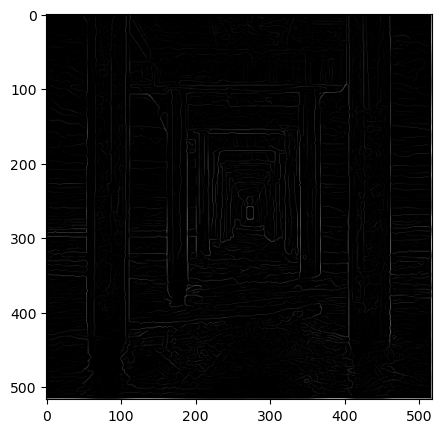

In [15]:
nms_image = nms(g_mag, g_theta)
print('NMS:')
plt.imshow(nms_image, cmap=cm.gray)
plt.show()

### Ζήτημα 2.4 Κατωφλίωση Υστέρησης (Hysteresis Thresholding) [5 μονάδες]
Επιλέξτε κατάλληλες τιμές κατωφλίων και χρησιμοποιήστε την προσέγγιση κατωφλίου που περιγράφεται στη διάλεξη 5. Αυτό θα αφαιρέσει τις ακμές που προκαλούνται από το θόρυβο και τις χρωματικές διαφοροποιήσεις. Μπορείτε να ανατρέξετε και σε άλλες πηγές (βιβλιογραφία, διαδίκτυο) για περισσότερες πληροφορίες στην προσέγγιση κατωφλίου.

  - Ορίστε δύο κατώφλια `t_min` και `t_max`.
  - Εάν το `nms > t_max`, τότε επιλέγουμε αυτό το pixel ως ακμή.
  - Εάν `nms < t_min`, απορρίπτουμε αυτό το pixel.
  - Αν `t_min < nms < t_max`, επιλέγουμε το pixel μόνο αν υπάρχει διαδρομή από/προς άλλο pixel με `nms > t_max`. (Υπόδειξη: Σκεφτείτε όλα τα pixel με `nms > t_max` ως σημεία έναρξης/εκκίνησης και εκτελέστε αναζήτηση BFS/DFS από αυτά τα σημεία εκκίνησης).
  - Η επιλογή της τιμής των χαμηλών και υψηλών κατωφλίων εξαρτάται από το εύρος των τιμών στην εικόνα μεγέθους κλίσης (gradient magnitude image). Μπορείτε να ξεκινήσετε ορίζοντας το υψηλό κατώφλι σε κάποιο ποσοστό της μέγιστης τιμής στην εικόνα μεγέθους ντεγκραντέ (gradient magnitude image), π.χ. `thres_high = 0,2 * image.max()`, και το χαμηλό όριο σε κάποιο ποσοστό του υψηλού ορίου, π.χ. `thres_low = 0,85 * thres_high`. Έπειτα, μπορείτε να συντονίσετε/τροποποιήσετε (tune) αυτές τις τιμές όπως θέλετε.

In [16]:
def hysteresis_threshold(image, g_theta, use_g_theta=False):
     
    #Firstly we initialize the thresholds, as instructed in the assignment instructions.
    #High threshold: thres_high = 0,165 * image.max() 
    #Low threshold: thres_low = 0,8 * thres_high
    #0,165 and 0,8 are the final/ tuned thresholds.
    thresh_high = 0.165*image.max()
    thresh_low = 0.8*thresh_high
    #Now we initialize the result array. This will hold the outcome image.
    result = np.zeros_like(image)
    #Another suggestion made by the instructions of the assignment is to use BFS/DFS.
    #The visited array serves this exact purpose. It's to keep track of the visited pixels.
    #Using a visited array is a "must", since without it we would have the risk of running..
    #..into potential endless loops. So with this data struct we can ensure that, once a pixel..
    #.. has been checked, it won't be again.
    #We know that in python the values 1,0 can also be interpreted as True,False.
    #So the usage of the function np.zeros_like() serves two purposes:
    #1)Of course the initialization/creation of the array
    #2)By initializing the array to 0 we also show that those elements have not been visited yet.
    #To signify that an element has been visited we simply change the value from 0/False to..
    #..1/True.
    visited = np.zeros_like(image)
    #Rows, columns are the y,x dimensions of the image 
    rows = image.shape[0]
    columns = image.shape[1]
    #Iterate through image
    for i in range(rows):
        for j in range(columns):
            #As we've already established we want to avoid checking the same pixel..
            #..more than once, hence the usage of visited[i,j] in this condition.
            #Also as it is stated in the assignment instructions we want every pixel..
            #..that has nms < t_min to be rejected.
            #So if either one of those criteria is met, we want the pixel to remain as 0.
            #That's why we use "continue". Continue makes it so that we skip the entirety..
            #..of the code left, for the current iteration.
            if visited[i,j] == 1: #If we've already visited this pixel
                continue #Pixel rejected. Skip the rest of the code 
            if image[i,j] < thresh_low: #If nms < t_min
                continue #Pixel rejected. Skip the rest of the code
            #This case is when "nms > t_max". In this case we want to mark the current..
            #..pixel as "visited". And set the pixel value to 1, since it is accepted..
            #..as a pixel that belongs in an edge.
            if image[i,j] > thresh_high:
                result[i,j] = 1 #Set value of pixel to 1 since nms > t_max
                visited[i,j] = 1 #We've traversed over this pixel, so mark it as visited
                continue #The rest of the code is for "t_min < nms < t_max".
                #So since for this pixel nms > t_max, skip the rest of the code.
            
            #Since all the other cases have passed all that's left is the case where..
            #.. the nms is in between the two thresholds.
            #This case is when "t_min < nms < t_max". By using the "continue" in the..
            #..prveious two conditions, we ensure that this point will be reached..
            #..only when the other two conditions are not met. So since..
            #..neither image[i,j] < thresh_low or image[i,j] > thresh_high were met..
            #..this is truly the case of "t_min < nms < t_max".
            #This is where the search takes place. We use a stack in order to keep all the..
            #..neighbors that need to be checked, as requested by the assignment
            stack = [(i,j)] #Create new stack with the 1st element the current (i,j) pair
            visited[i,j] = 1 #Since we're currently traversing this pixel set it as visited
            while 1: #As long as there are elements in the stack keep checking
                # while 1 or while True will make it so that this loop runs indefinitely
                #When it's time for it to stop we will "break" out of it.
                if len(stack) == 0: #Once stack gets empty we need to break the loop
                    #It is of utmost importance that this condition check is the first thing..
                    #..in the loop, since we've selected "while".
                    break
                flag = 0 #Binary(boolean) flag. It will help determine whether or not we've..
                #.. met another "strong" neighboring pixel, so that we know whether or not..
                #.. to assign 1 to the current pixel.
                poppedItem = stack.pop() #Remove first stack element, keeping it in a var.
                #Assing the pixel position values to x,y. They will be used to help with the..
                #..iteration through the neighboring pixels.
                x = poppedItem[0] 
                y = poppedItem[1]
                #Initialize an array that contains the coordinates of the neighboring pixels
                #The neighboring pixels are basically -1/+1 in the x,y axes.
                #Depending on the requirements we set, the neighboring pixels can either..
                #..be those on the "cross-pattern", meaning up/down/left/right.
                #Or they can also include the diagonal ones, as well.
                #Since is has not been specified we include all 8. The cross pattern, plus the..
                #..diagonal ones.
                #This can be easily changed. Just below this line, the other line of code..
                #..has been provided as well. Just swap the lines in and out of comments.
                neighborhood = [[x-1,y],[x+1,y],[x,y-1],[x,y+1],[x-1,y-1],[x-1,y+1],[x+1,y-1],[x+1,y+1]]
                #               ~~~~~~~~~cross-pattern~~~~~~~~  ~~~~~~~~~~~~~diagonal-ones~~~~~~~~~~~~~
                #neighborhood = [[x-1,y],[x+1,y],[x,y-1],[x,y+1]]
                
                #It's time to check the neighboring pixels. If any of them is "strong"..
                #..We need to set result[i,j] to 1.
                for neighbor in neighborhood: #For each neighboring element
                    #Since we are adding/ subtracting 1's we need to check whether or not..
                    #..we're out of the image dimensions. This could happen when the current pixel..
                    #..we're checking is on the edges of the image. 
                    #If any of those is true we need to skip the rest of the code
                    if (neighbor[0] < 0 or neighbor[0] >= rows):
                        continue
                    if(neighbor[1] < 0 or neighbor[1] >= columns):
                        continue
                    #If this pixel has already been visited, skip the rest of the code
                    #This ensures that we don't have any endless loops.
                    #Since the rest of the code will be skipped, the pixel won't be added..
                    #.. once again to the stack, for checking
                    #This way once we've checked every neighboring pixel once, we can move on
                    if (visited[neighbor[0],neighbor[1]]):
                        continue
                    #The condition for the current "t_min < nms < t_max" case to result in..
                    #..a result[i,j] = 1 is to have a strong neighboring pixel.
                    #If the neighboring pixel is not strong we don't care for it.
                    if(image[neighbor[0],neighbor[1]]<thresh_high):
                        continue
                    #If image[neighbor[0],neighbor[1]]>thresh_high we've found at least one..
                    #.."strong" neighboring pixel. So we need to set our result[x,y] to 1..
                    #.. since it is connected to a "strong" pixel.
                    if(image[neighbor[0],neighbor[1]]>thresh_high):
                        flag = 1 #Set flag to 1 to help with the condition check later on.
                    #Mark neighboring pixel as visited. This line in combination with the..
                    #..condition check ensures that there are no endless loops.
                    visited[neighbor[0],neighbor[1]] = 1
                    #Add neighboring pixel coordinates to the stack.
                    stack.append((neighbor[0],neighbor[1]))
                #We want this condition to be at the end of the loop. If we've met at least..
                #.. one "strong" neighbor, then and only then set result[x,y] to 1.
                if(flag == 1):
                    result[x,y] = 1

    return result

Thresholded:


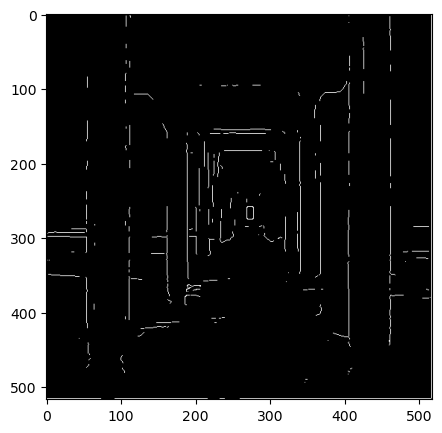

In [17]:
thresholded = hysteresis_threshold(nms_image, g_theta)
print('Thresholded:')
plt.imshow(thresholded, cmap=cm.gray)
plt.show()

## Οδηγίες υποβολής

Μην ξεχάσετε να κάνετε turnin **τόσο** το αρχείο Jupyter notebook όσο και το PDF αρχείο αυτού του notebook μαζί με το συνοδευτικό αρχείο `onoma.txt`:
**turnin  assignment_2@mye046  onoma.txt  assignment2.ipynb  assignment2.pdf**

Βεβαιωθείτε ότι το περιεχόμενο σε **κάθε κελί εμφανίζεται** καθαρά στο τελικό σας αρχείο PDF.
Για να μετατρέψετε το σημειωματάριο σε PDF, μπορείτε να επιλέξετε **έναν** από τους παρακάτω τρόπους:

1. Google Collab (Συνιστάται): You can `print` the web page and save as PDF (e.g. Chrome: Right click the web page $\rightarrow$ Print... $\rightarrow$ Choose "Destination: Save as PDF" and click "Save"). Προσοχή στην περίπτωση όπου κώδικας/σχόλια εμφανίζονται εκτός των ορίων της σελίδας. Μια λύση είναι η αλλαγή γραμμής π.χ. σε σχόλια που υπερβαίνουν το πλάτος της σελίδας.

2. Local Jupyter/JupyterLab(Συνιστάται): You can `print` the web page and save as PDF (File $\rightarrow$ Print... $\rightarrow$ Choose "Destination: Save as PDF" and click "Save"). Προσοχή στην περίπτωση όπου κώδικας/σχόλια εμφανίζονται εκτός των ορίων της σελίδας. Μια λύση είναι η αλλαγή γραμμής π.χ. σε σχόλια που υπερβαίνουν το πλάτος της σελίδας.

3. Local Jupyter/JupyterLab(Συνιστάται!): You can `export` and save as HTML (File $\rightarrow$ Save & Export Notebook as... $\rightarrow$ HTML). Στη συνέχεια μπορείτε να μετατρέψεται το HTML αρχείο αποθηκεύοντάς το ως PDF μέσω ενός browser.